# Runtime Test

This notebook contains an empirical evaluation of the runtimes of all testing routines as an addition to the theoretical analysis in the thesis.

In [24]:
%load_ext autoreload
%autoreload 2

import numpy as np

from descriptor_utils import DescriptorWrapper
from experiment_utils import plot_evaluation
from tqdm import tqdm
import pandas as pd
import time
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
data = np.load("point_clouds/all_point_clouds.npz", allow_pickle=True)
point_clouds = data['objects']
labels = data['labels']

In [26]:
# duplicate 10 times
for i in range(3):
    point_clouds = np.concatenate((point_clouds, point_clouds))

In [27]:
descriptor_wrapper = DescriptorWrapper()

descriptors = [['evrap', 'samp', 'sirm', 'scomp'], ['pfh'], ['sector_model'], ['combined_model'], ['shell_model'],
               ['evrap'], ['samp'], ['sirm'], ['scomp']]
runtime_data = {**{'_'.join(descriptor): [] for descriptor in descriptors}}

In [28]:
data_size = range(200, 1501, 100)
for test_size in tqdm(data_size, desc=""):
    test_data = point_clouds[:test_size]
    for descriptor in descriptors:
        if len(descriptor) < 2:
            descriptor = descriptor[0]
            start_time = time.perf_counter()
            descriptor_wrapper.compute_model_on_dataset(test_data, descriptor)
            runtime_data[descriptor].append(time.perf_counter() - start_time)
    
    runtime_data['evrap_samp_sirm_scomp'].append(sum(runtime_data[key][-1] for key in ['evrap', 'sirm', 'scomp', 'samp']))

100%|██████████| 14/14 [19:34<00:00, 83.93s/it] 


In [29]:
runtime_data

{'evrap_samp_sirm_scomp': [10.574497048999547,
  16.55805595200127,
  22.131073135000406,
  27.811622747,
  33.932954860999416,
  39.8539265469999,
  45.80454336399998,
  51.804558085999815,
  57.467682780999894,
  65.04174238699943,
  70.65656424400004,
  76.45181977199991,
  80.25355236999985,
  88.27063261200055],
 'pfh': [6.818707323000126,
  10.296167399999831,
  14.177879339000356,
  18.042009920000055,
  23.844629987999724,
  26.14596282599996,
  30.09580632699999,
  34.05542049499945,
  44.559205918999396,
  41.50032088700027,
  45.02962005500012,
  49.390128351000385,
  57.07071221200022,
  65.43421371900058],
 'sector_model': [0.09413785000015196,
  0.14787120200071513,
  0.19139646399980847,
  0.2273137410002164,
  0.2691321309994237,
  0.29652437400000053,
  0.33295675799945457,
  0.36367908300053386,
  0.384046299000147,
  0.446705768999891,
  0.47486489299990353,
  0.5094917649994386,
  0.517112773000008,
  0.5853033140001571],
 'combined_model': [0.2167565609997837,
  0.

In [30]:
runtime_data = pd.DataFrame(runtime_data)
# runtime_df['combination'] = runtime_df[['evrap', 'samp', 'scomp', 'sirm']].sum(axis=1)

In [31]:
runtime_data.to_csv('test_output/runtime_data.csv')

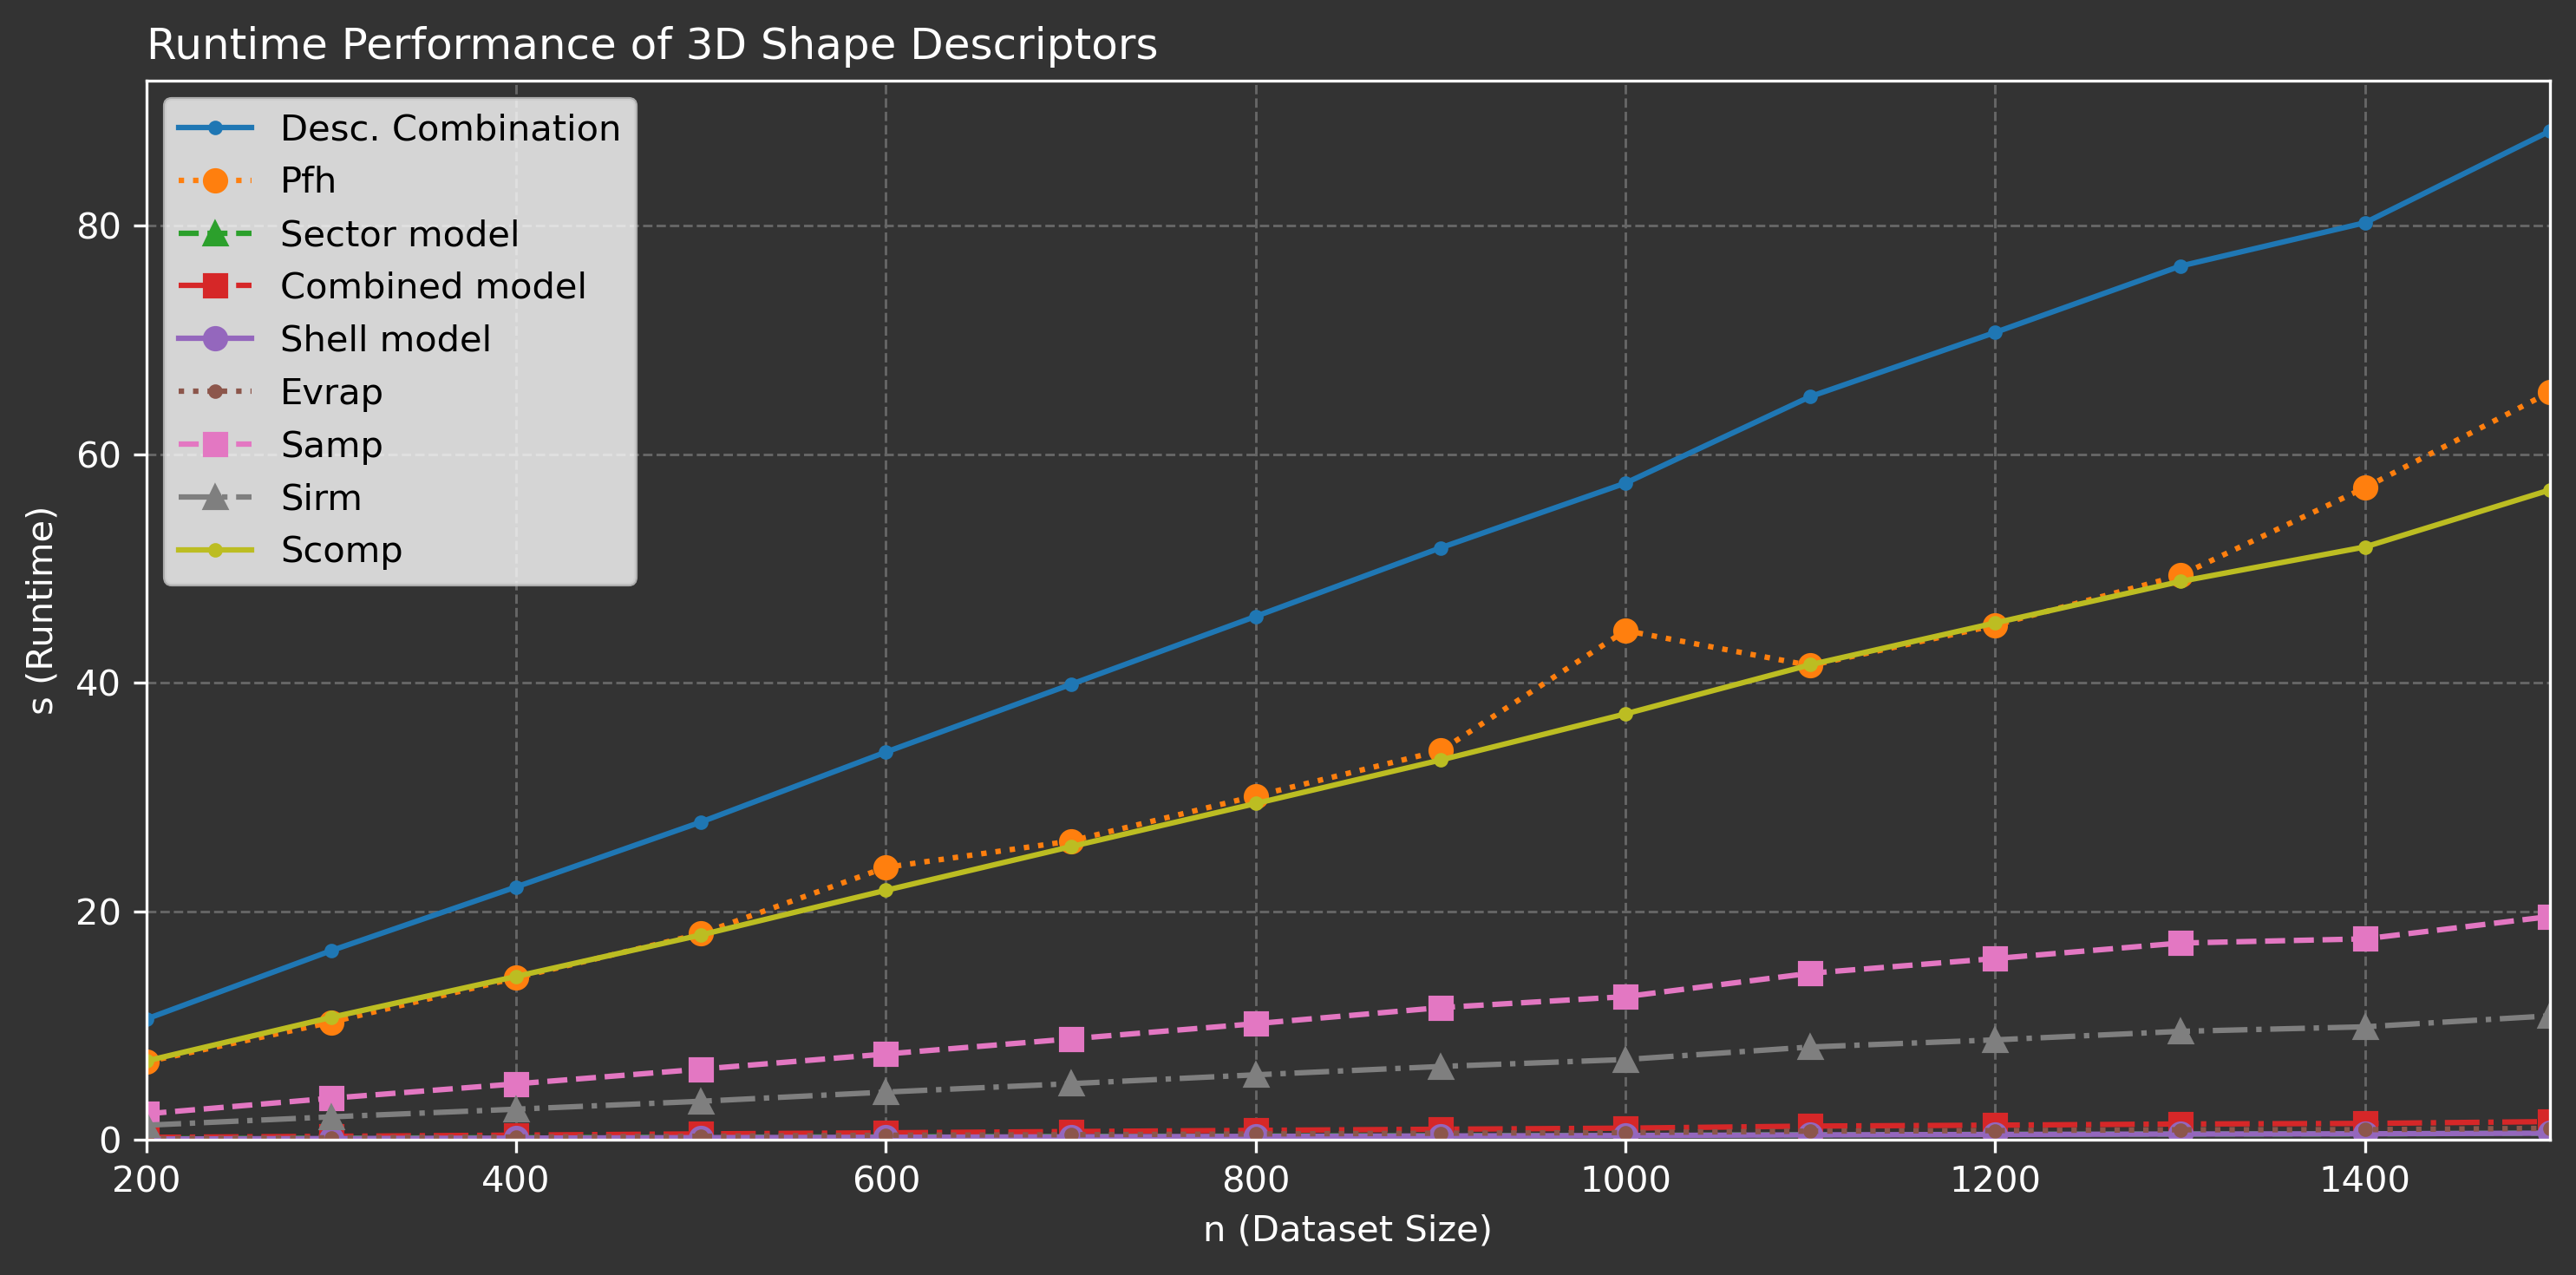

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5), dpi=300)  # Example with a 2x2 grid of subplots

plot_evaluation(axes, descriptors, runtime_data, data_size,
                x_label='n (Dataset Size)', y_label='s (Runtime)',
                title='Runtime Performance of 3D Shape Descriptors')

# Set figure background and adjust layout
fig.patch.set_facecolor('#333333')  # Dark grey background for the figure
fig.tight_layout()  # Ensure subplots fit within the figure

plt.savefig(f"mcgill_runtime.png", dpi=300)
plt.show()

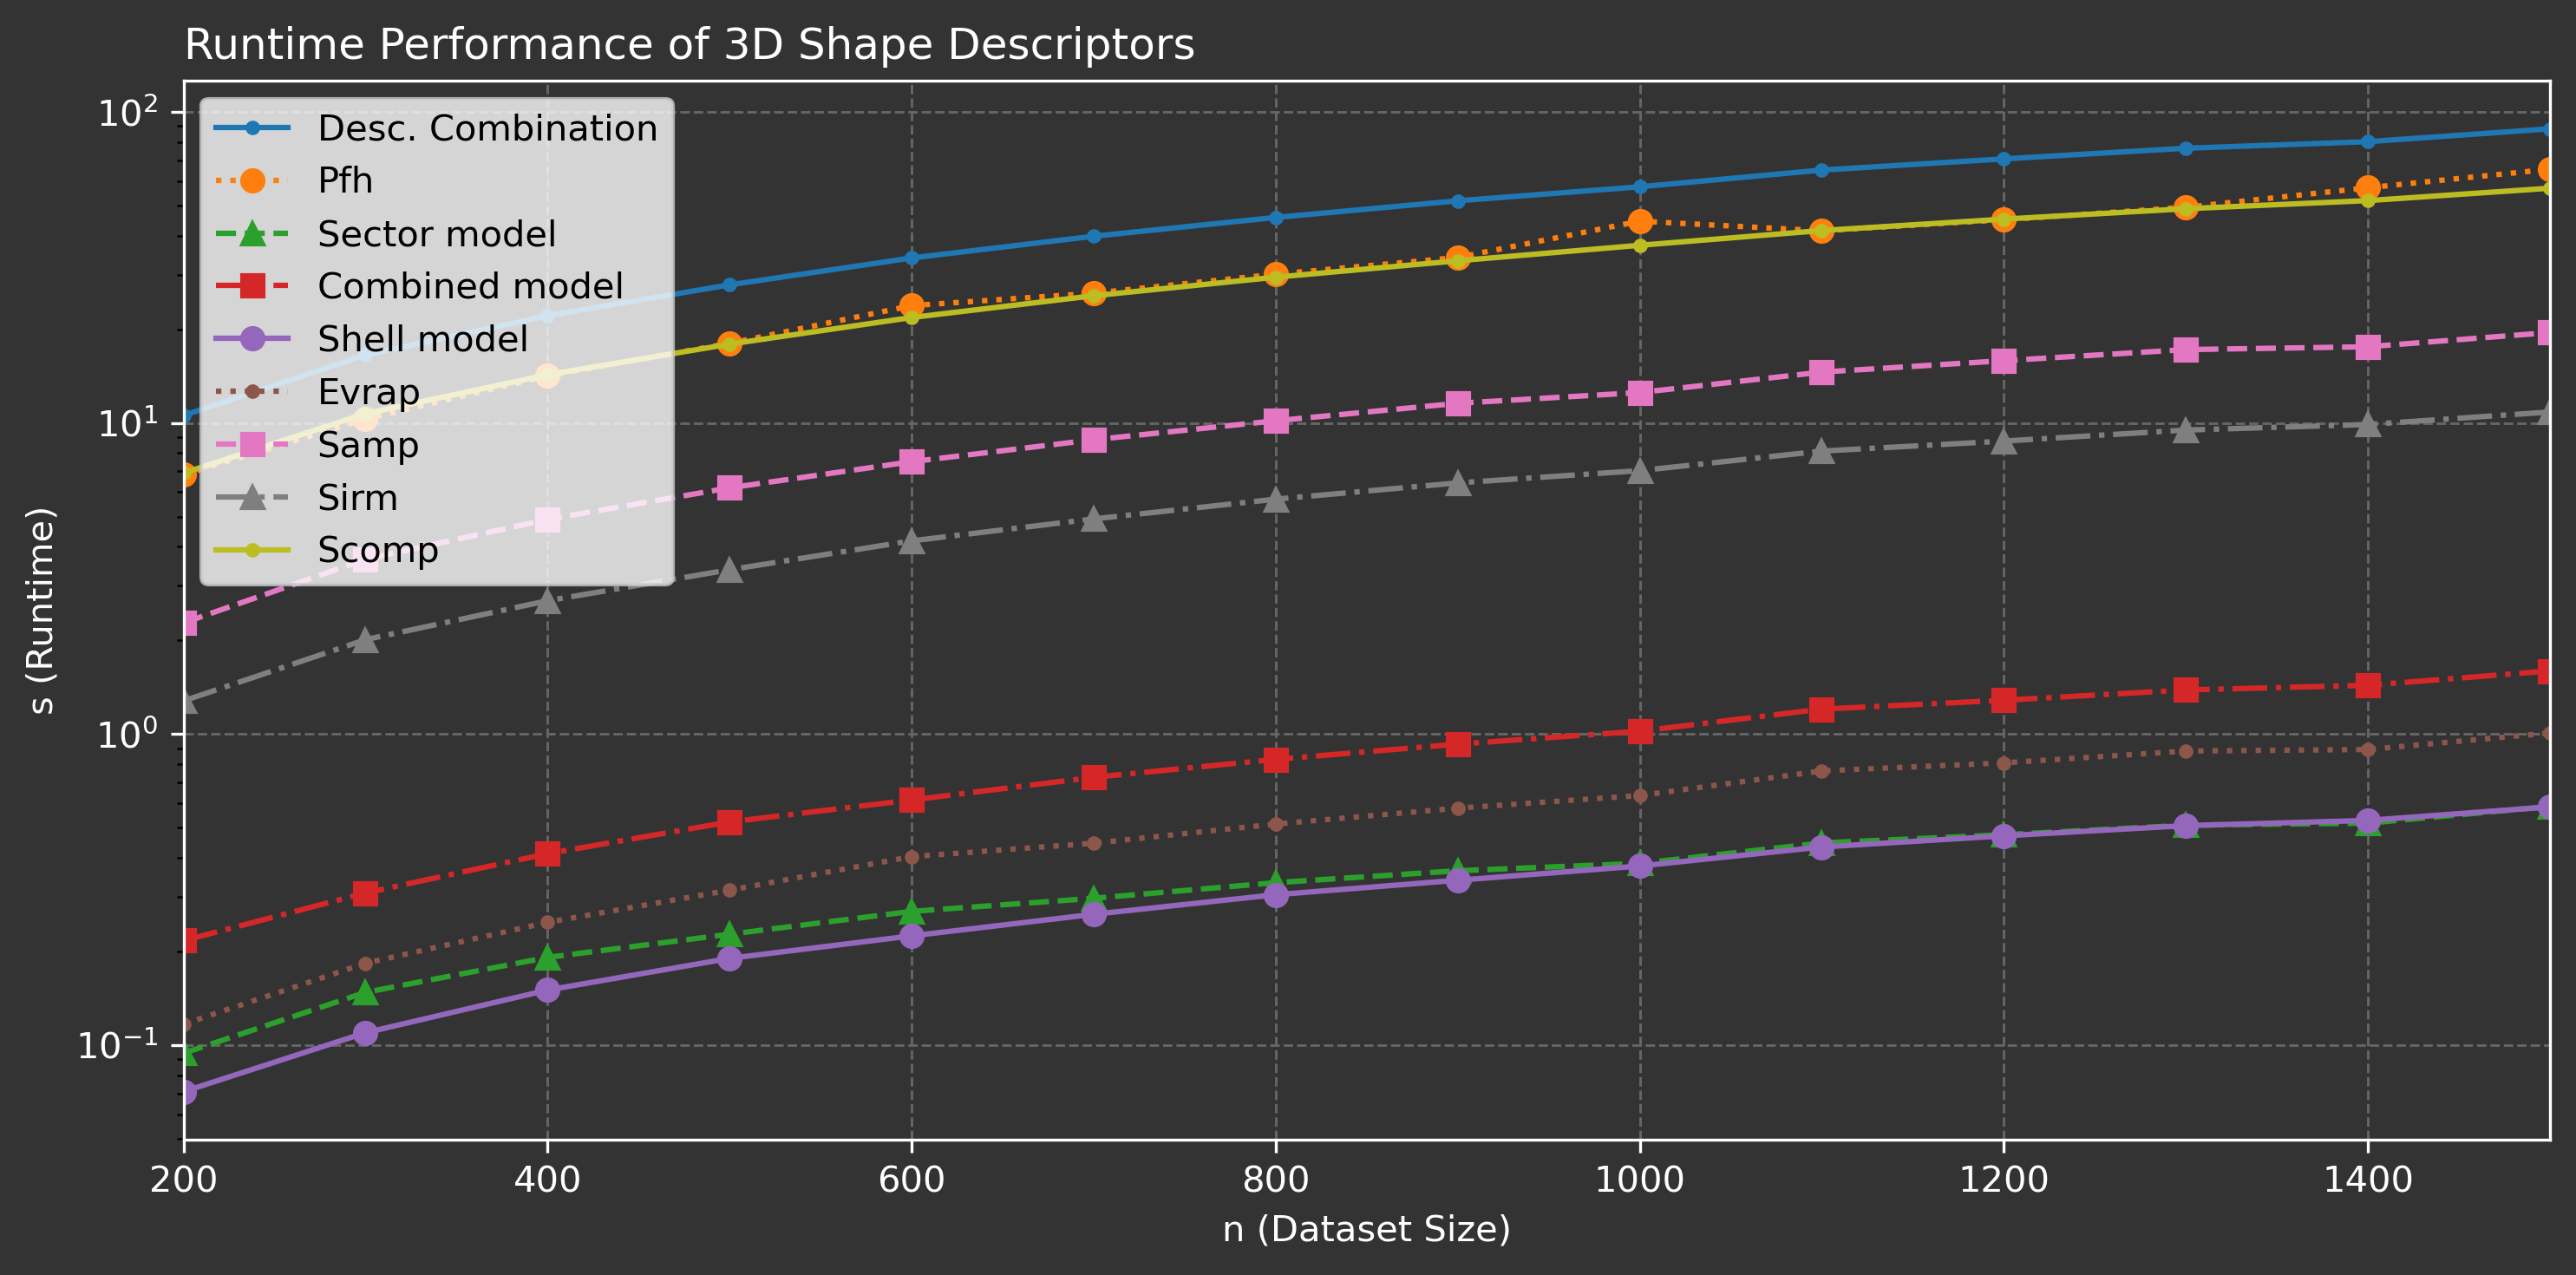

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5), dpi=300)  # Example with a 2x2 grid of subplots

plot_evaluation(axes, descriptors, runtime_data, data_size,
                x_label='n (Dataset Size)', y_label='s (Runtime)',
                title='Runtime Performance of 3D Shape Descriptors', log_y=True)

# Set figure background and adjust layout
fig.patch.set_facecolor('#333333')  # Dark grey background for the figure
fig.tight_layout()  # Ensure subplots fit within the figure

plt.savefig(f"mcgill_runtime_logy.png", dpi=300)
plt.show()